In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
cab_data = pd.read_csv('Cab_Data_Modified.csv')
transc = pd.read_csv('Transaction_ID.csv')
cust = pd.read_csv('Customer_ID.csv')
city = pd.read_csv('City.csv')

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Day,Month,Year,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,01/08/16,8,1,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,01/06/16,6,1,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,01/02/16,2,1,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,01/07/16,7,1,2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,01/03/16,3,1,2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 10 columns):
Transaction ID    1998 non-null int64
Date of Travel    1998 non-null object
Day               1998 non-null int64
Month             1998 non-null int64
Year              1998 non-null int64
Company           1998 non-null object
City              1998 non-null object
KM Travelled      1998 non-null float64
Price Charged     1998 non-null float64
Cost of Trip      1998 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 156.2+ KB


In [5]:
transc.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
transc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
Transaction ID    1999 non-null int64
Customer ID       1999 non-null int64
Payment_Mode      1999 non-null object
dtypes: int64(2), object(1)
memory usage: 47.0+ KB


In [7]:
cust.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
Customer ID           49171 non-null int64
Gender                49171 non-null object
Age                   49171 non-null int64
Income (USD/Month)    49171 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


# City data set

In [9]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
City          20 non-null object
Population    20 non-null object
Users         20 non-null object
dtypes: object(3)
memory usage: 608.0+ bytes


In [11]:
city['Population'].value_counts().head(2)

 943,999     1
 248,968     1
Name: Population, dtype: int64

In [12]:
city['Users'] = city['Users'].apply(lambda x: x.replace(',','')).astype(int)
city['Population'] = city['Population'].apply(lambda x: x.replace(',','')).astype(int)

In [13]:
city['Users'].astype(int).head(2)

0    302149
1    164468
Name: Users, dtype: int64

In [14]:
city['Percentage_of_users'] = (city['Users']/city['Population'])*100

In [15]:
city.head(3)

,City,Population,Users,Percentage_of_users
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279


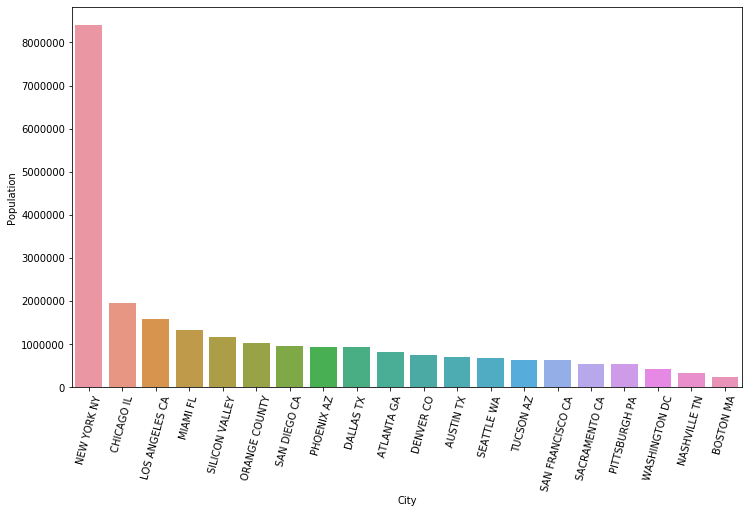

In [171]:
plt.subplots(figsize= (12,7))
sns.barplot(x = city['City'], y = city['Population'], data = city)
plt.xticks(rotation = 75)
plt.show()

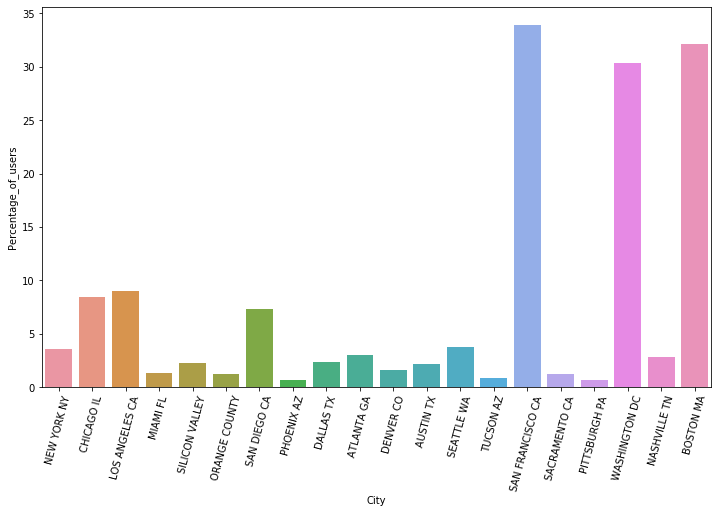

In [174]:
plt.subplots(figsize= (12,7))
sns.barplot(x = city['City'], y = city['Percentage_of_users'], data = city,)
plt.xticks(rotation = 75)
plt.show()

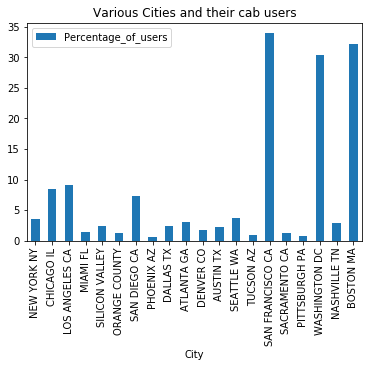

In [16]:
city.plot(y = 'Percentage_of_users', x = 'City', kind = 'bar')
plt.title('Various Cities and their cab users')
plt.ylabel = 'percent_of_users_with_population'
plt.show()

- SAN FRANCISCO CA, has the highest number of cab users with respect to population 

In [17]:
city[city['Percentage_of_users'] == city['Percentage_of_users'].max()]

,City,Population,Users,Percentage_of_users
14,SAN FRANCISCO CA,629591,213609,33.928217


# Cab_Data

In [18]:
cab_data.head(2)

,Transaction ID,Date of Travel,Day,Month,Year,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,01/08/16,8,1,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,01/06/16,6,1,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [19]:
cab_data.describe(include = 'all')

,Transaction ID,Date of Travel,Day,Month,Year,Company,City,KM Travelled,Price Charged,Cost of Trip
count,1.998000e+03,1998,1998.00000,1998.0,1998.0,1998,1998,1998.000000,1998.000000,1998.000000
unique,NaN,18,NaN,NaN,NaN,2,19,NaN,NaN,NaN
top,NaN,01/09/16,NaN,NaN,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,262,NaN,NaN,NaN,1544,462,NaN,NaN,NaN
mean,1.000128e+07,NaN,9.32032,1.0,2016.0,NaN,NaN,22.849484,501.943554,290.440613
std,7.348167e+02,NaN,4.59665,0.0,0.0,NaN,NaN,12.261001,311.829241,158.754446
min,1.000001e+07,NaN,2.00000,1.0,2016.0,NaN,NaN,1.900000,22.200000,19.380000
25%,1.000065e+07,NaN,6.00000,1.0,2016.0,NaN,NaN,12.430000,244.722500,155.943000
50%,1.000131e+07,NaN,9.00000,1.0,2016.0,NaN,NaN,22.680000,465.920000,288.919600
75%,1.000195e+07,NaN,13.00000,1.0,2016.0,NaN,NaN,33.230000,720.595000,421.344000


In [20]:
cab_data.describe()

,Transaction ID,Day,Month,Year,KM Travelled,Price Charged,Cost of Trip
count,1.998000e+03,1998.00000,1998.0,1998.0,1998.000000,1998.000000,1998.000000
mean,1.000128e+07,9.32032,1.0,2016.0,22.849484,501.943554,290.440613
std,7.348167e+02,4.59665,0.0,0.0,12.261001,311.829241,158.754446
min,1.000001e+07,2.00000,1.0,2016.0,1.900000,22.200000,19.380000
25%,1.000065e+07,6.00000,1.0,2016.0,12.430000,244.722500,155.943000
50%,1.000131e+07,9.00000,1.0,2016.0,22.680000,465.920000,288.919600
75%,1.000195e+07,13.00000,1.0,2016.0,33.230000,720.595000,421.344000
max,1.000261e+07,19.00000,1.0,2016.0,47.600000,1544.450000,668.160000


In [21]:
cab_data['Company'].value_counts()

Yellow Cab    1544
Pink Cab       454
Name: Company, dtype: int64

#### There are 2 CAB companies ..... 
- Yellow Cab has made highest no. of trips

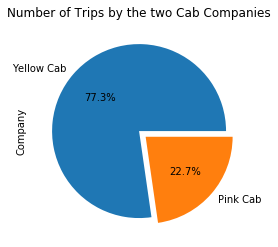

In [22]:
cab_data['Company'].value_counts().plot(kind = 'pie', autopct ='%1.1f%%', explode = [0,0.1])
plt.title('Number of Trips by the two Cab Companies')
plt.show()

#### Dt. of Travel VS Cab Company

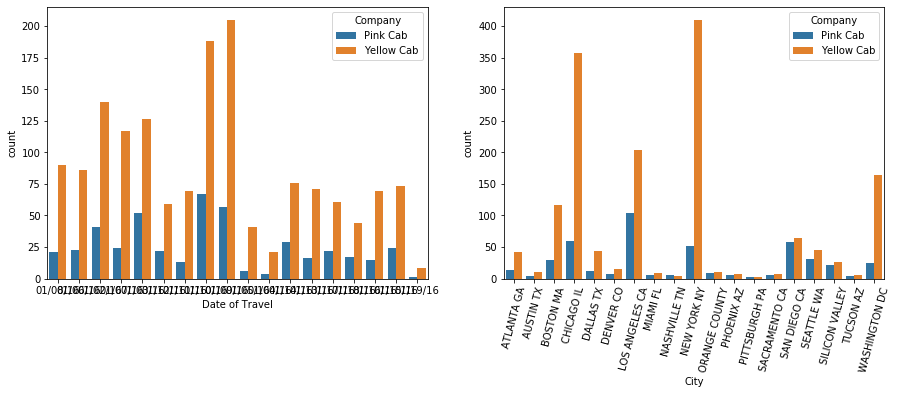

In [23]:
#plt.figure(figsize = (9,5))
fig, ax = plt.subplots(1,2,figsize = (15,5))
sns.countplot(cab_data['Date of Travel'], hue = cab_data['Company'], ax= ax[0])
plt.xticks(rotation = 75)
sns.countplot(cab_data['City'], hue = cab_data['Company'], ax = ax[1])
plt.xticks(rotation = 75)
plt.show()

- Mostly travelled on Date: 42378, and that too YELLOW CAB
- 

- Amongst the 2 companies , highest number of Cab trips are made in NYC
- Amongst the number, Yellow Cab is the Highest taken

In [24]:
cab_data['Price Charged'].astype(float)

0       370.95
1       358.52
2       125.20
3       377.40
4       114.62
         ...  
1993    581.27
1994    750.50
1995    302.97
1996    259.78
1997    159.07
Name: Price Charged, Length: 1998, dtype: float64

In [25]:
corrM = cab_data[['KM Travelled','Price Charged', 'Cost of Trip']].corr()
corrM

,KM Travelled,Price Charged,Cost of Trip
KM Travelled,1.000000,0.879776,0.982567
Price Charged,0.879776,1.000000,0.907787
Cost of Trip,0.982567,0.907787,1.000000


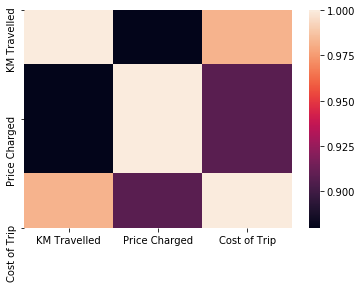

In [26]:
sns.heatmap(corrM)
plt.show()

- Cost of Trip and Price Charged are highly Correlated

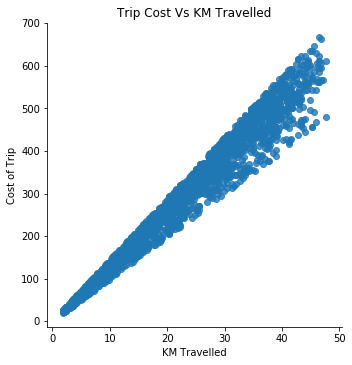

In [27]:
sns.lmplot(x = 'KM Travelled', y = 'Cost of Trip', data = cab_data, fit_reg = False)
plt.title('Trip Cost Vs KM Travelled')
plt.show()

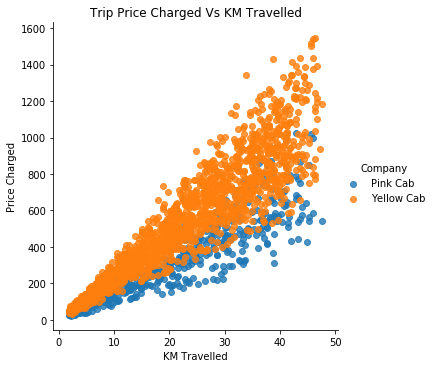

In [28]:
sns.lmplot(x = 'KM Travelled', y = 'Price Charged', data = cab_data, fit_reg =  False, hue = 'Company')
plt.title('Trip Price Charged Vs KM Travelled')
plt.show()

- Althogh Yellow Cab is priced very high, most of the people travelled in Yellow Cab rather than Pink Cab

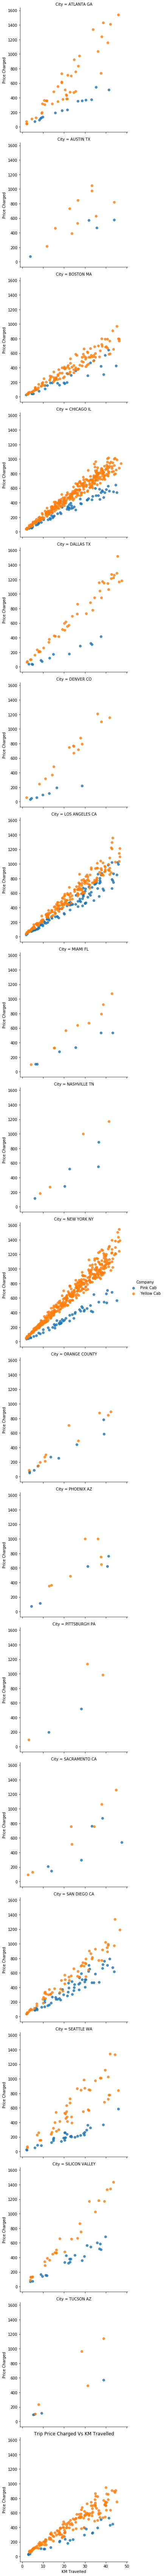

In [29]:
sns.lmplot(x = 'KM Travelled', y = 'Price Charged', data = cab_data, fit_reg =  False, hue = 'Company', row = 'City')
plt.title('Trip Price Charged Vs KM Travelled')
plt.show()

#### Cost of TRip VS KM travelled

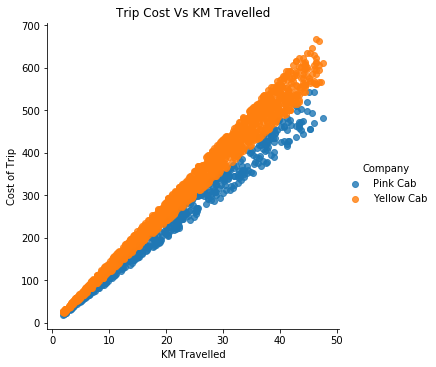

In [30]:
sns.lmplot(x = 'KM Travelled', y = 'Cost of Trip', data = cab_data, fit_reg = False, hue = 'Company')
plt.title('Trip Cost Vs KM Travelled')
plt.show()

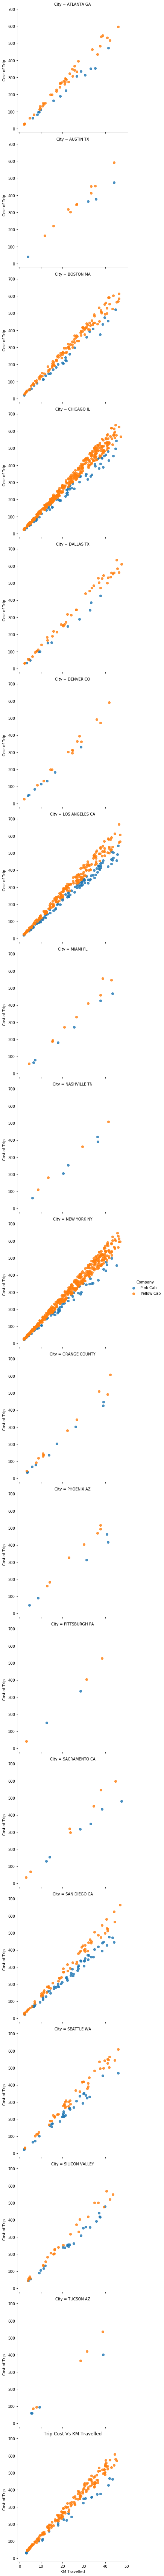

In [31]:
sns.lmplot(x = 'KM Travelled', y = 'Cost of Trip', data = cab_data, fit_reg = False, hue = 'Company', row = 'City')
plt.title('Trip Cost Vs KM Travelled')
plt.show()

## Why are people travelling in Yellow Cab although they are priced very high?

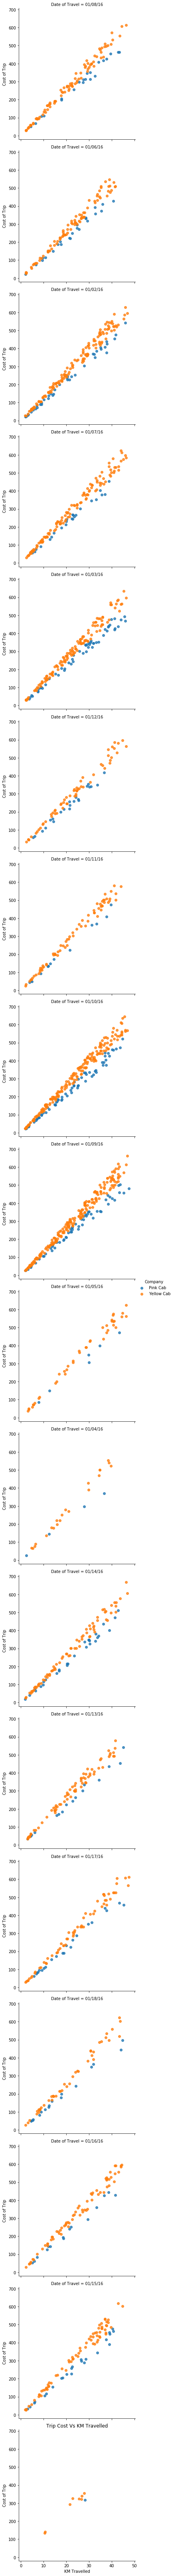

In [32]:
sns.lmplot(x = 'KM Travelled', y = 'Cost of Trip', data = cab_data, fit_reg = False, hue = 'Company', row = 'Date of Travel')
plt.title('Trip Cost Vs KM Travelled')
plt.show()

- On 42388, only one ride by pink cab...... mayb availability of the Pink Cabs are less.
- On 42374, there are only 6 trips by Pink cab, and similarly on 42381  and following dates.

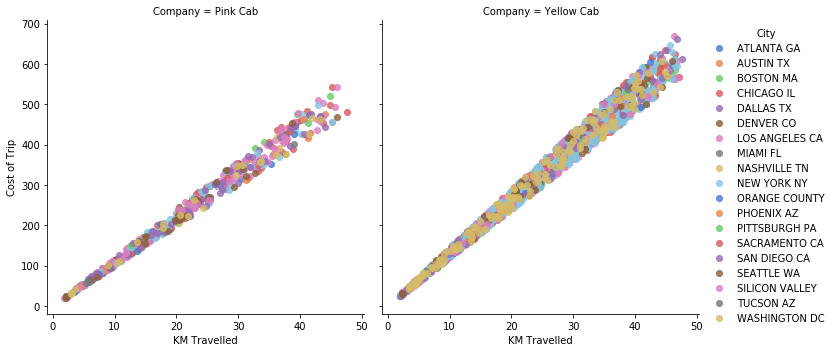

In [33]:
sns.lmplot(x = 'KM Travelled', y = 'Cost of Trip', data = cab_data, fit_reg = False, col = 'Company', hue = 'City', palette = 'muted')
#plt.title('Trip Cost Vs KM Travelled')
plt.show()

In [34]:
cab_data['Profit Margin'] = cab_data['Price Charged'] - cab_data['Cost of Trip']
#cab_data.drop('difference_percent', axis = 1, inplace = True)
cab_data.head()

,Transaction ID,Date of Travel,Day,Month,Year,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Margin
0,10000011,01/08/16,8,1,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,01/06/16,6,1,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,01/02/16,2,1,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,01/07/16,7,1,2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,01/03/16,3,1,2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


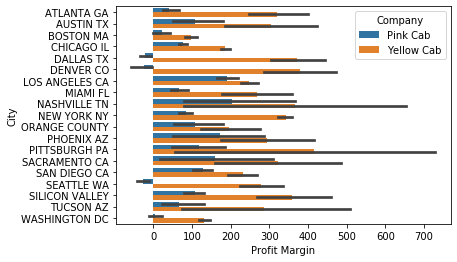

In [35]:
sns.barplot(x = 'Profit Margin', y = 'City', hue = 'Company', data = cab_data)
plt.show()

In [36]:
pd.crosstab(cab_data['Company'], cab_data['Profit Margin'])

Profit Margin,-125.0460,-121.6220,-113.4600,-111.5000,-94.4260,-91.8640,-87.3660,-86.4420,-77.9320,-73.5700,...,826.3240,858.0440,871.8852,877.0076,885.1860,888.0400,895.7768,934.0560,944.1908,948.5456
Company,,,,,,,,,,,,,,,,,,,,,
Pink Cab,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Yellow Cab,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


## Cab_data and Transaction data

In [37]:
cab_transc = pd.merge(cab_data, transc, on = 'Transaction ID')

In [38]:
cab_data.head()

,Transaction ID,Date of Travel,Day,Month,Year,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Margin
0,10000011,01/08/16,8,1,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,01/06/16,6,1,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,01/02/16,2,1,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,01/07/16,7,1,2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,01/03/16,3,1,2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [39]:
transc.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [40]:
cab_transc.tail()

,Transaction ID,Date of Travel,Day,Month,Year,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Margin,Customer ID,Payment_Mode
1553,10002005,01/09/16,9,1,2016,Yellow Cab,CHICAGO IL,26.52,641.46,353.2464,288.2136,3252,Cash
1554,10002006,01/17/16,17,1,2016,Yellow Cab,CHICAGO IL,39.27,771.77,490.0896,281.6804,5029,Card
1555,10002007,01/10/16,10,1,2016,Yellow Cab,CHICAGO IL,15.34,413.41,198.8064,214.6036,4176,Card
1556,10002008,01/14/16,14,1,2016,Yellow Cab,CHICAGO IL,7.68,155.80,99.5328,56.2672,4014,Card
1557,10002009,01/14/16,14,1,2016,Yellow Cab,DALLAS TX,3.88,99.51,54.4752,45.0348,26938,Card


In [41]:
pd.crosstab(cab_transc['Transaction ID'], cab_transc['Company'])

Company,Pink Cab,Yellow Cab
Transaction ID,,
10000011,1,0
10000012,1,0
10000013,1,0
10000014,1,0
10000015,1,0
...,...,...
10002005,0,1
10002006,0,1
10002007,0,1


In [42]:
pd.crosstab(cab_transc['Transaction ID'], cab_transc['Company']).sum()

Company
Pink Cab       454
Yellow Cab    1104
dtype: int64

# Transcations made by Yellow Cab is more than Pink Cab, Which means the biasness of the data is more towards Yellow Cab. 

In [43]:
cab_transc['Payment_Mode'].value_counts()

Card    914
Cash    644
Name: Payment_Mode, dtype: int64

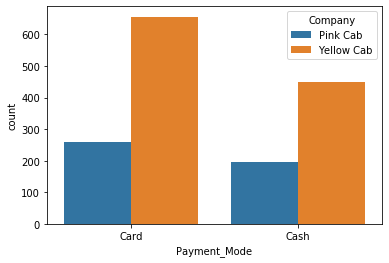

In [44]:
sns.countplot('Payment_Mode', data = cab_transc, hue = 'Company')
plt.show()

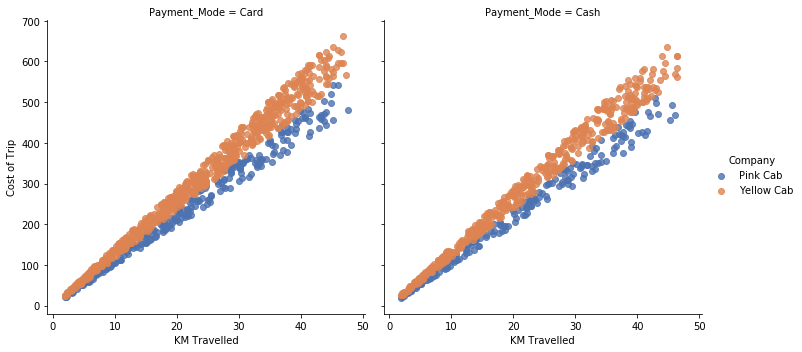

In [45]:
sns.lmplot(x = 'KM Travelled', y = 'Cost of Trip', data = cab_transc, fit_reg = False, 
           col = 'Payment_Mode', hue = 'Company',palette = 'deep')
plt.show()

## Price stats

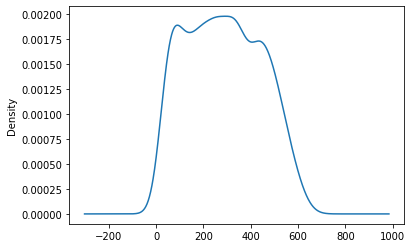

In [46]:
cab_transc['Cost of Trip'].plot(kind = 'density')
plt.show()

In [47]:
cab_transc['Cost of Trip'].skew()

0.12528724721073375

In [48]:
cab_transc['Cost of Trip'].kurt()

-1.0428590922818015

## City and Company COnversion rate

In [49]:
pd.crosstab(cab_transc['City'], cab_transc['Company'])

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,14,42
AUSTIN TX,4,10
BOSTON MA,29,116
CHICAGO IL,60,358
DALLAS TX,12,28
DENVER CO,7,7
LOS ANGELES CA,104,108
MIAMI FL,6,5
NASHVILLE TN,5,2


In [50]:
pd.crosstab(cab_transc['City'], cab_transc['Company']).apply(lambda x: x/x.sum(), 
                                                             axis = 1).sort_values(by = 'Yellow Cab', ascending = False)

Company,Pink Cab,Yellow Cab
City,,
CHICAGO IL,0.143541,0.856459
WASHINGTON DC,0.157895,0.842105
BOSTON MA,0.200000,0.800000
NEW YORK NY,0.205534,0.794466
ATLANTA GA,0.250000,0.750000
AUSTIN TX,0.285714,0.714286
DALLAS TX,0.300000,0.700000
LOS ANGELES CA,0.490566,0.509434
DENVER CO,0.500000,0.500000


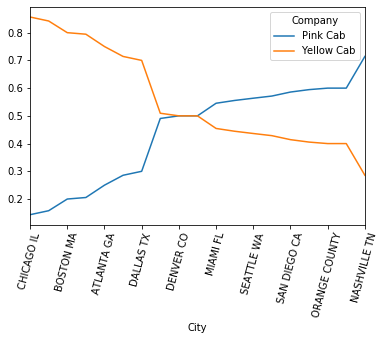

In [160]:
pd.crosstab(cab_transc['City'], cab_transc['Company']).apply(lambda x: x/x.sum(), 
                                                             axis = 1).sort_values(by = 'Yellow Cab', ascending = False).plot()
plt.xticks(rotation = 75)
plt.show()

In [161]:
pd.crosstab(cab_transc['City'], cab_transc['Company'],values='Population',aggfunc ='count').sort_values(by = 'Yellow Cab', ascending = False)

Company,Pink Cab,Yellow Cab
City,,
CHICAGO IL,60,358
NEW YORK NY,52,201
WASHINGTON DC,24,128
BOSTON MA,29,116
LOS ANGELES CA,104,108
ATLANTA GA,14,42
SAN DIEGO CA,58,41
DALLAS TX,12,28
SEATTLE WA,31,24


In [51]:
pd.crosstab(cab_transc['Payment_Mode'], cab_transc['Company'])

Company,Pink Cab,Yellow Cab
Payment_Mode,,
Card,258,656
Cash,196,448


In [52]:
pd.crosstab(cab_transc['Company'],cab_transc['Payment_Mode']).apply(lambda x:x/ x.sum(), axis = 1)

Payment_Mode,Card,Cash
Company,,
Pink Cab,0.568282,0.431718
Yellow Cab,0.594203,0.405797


- Card and Cash percentage for both the companies remain the same, most preferable payment method is Card

# Customer_data 

In [53]:
cust.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


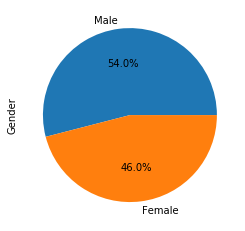

In [54]:
cust['Gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', )
plt.show()

In [55]:
cust['Age'].value_counts().head()

20    1641
34    1629
39    1624
23    1615
25    1597
Name: Age, dtype: int64

In [56]:
cust['Age'].value_counts().tail()

60    501
57    498
62    497
44    492
65    492
Name: Age, dtype: int64

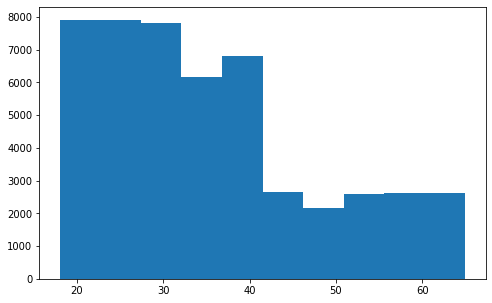

In [57]:
plt.figure(figsize = (8,5))
cust['Age'].hist()
plt.xticks(rotation = 0)
plt.grid()
plt.show()

In [58]:
cust.describe().drop('Customer ID', axis = 1)

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


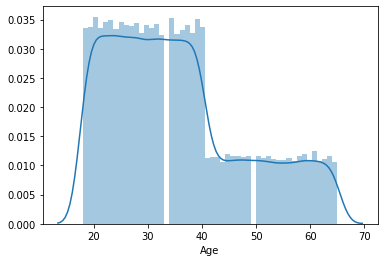

In [59]:
sns.distplot(cust['Age'])
plt.show()

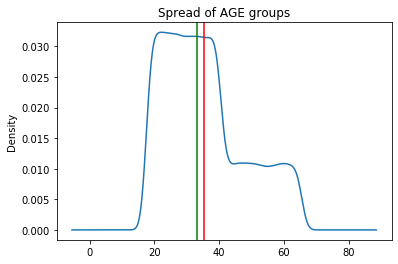

In [60]:
cust['Age'].plot(kind = 'density')
plt.title('Spread of AGE groups')
plt.axvline(cust['Age'].mean(), color = 'r')
plt.axvline(cust['Age'].median(), color = 'g')
plt.show()

In [61]:
print('The mean age of the customers: ',cust['Age'].mean())

The mean age of the customers:  35.363120538528804


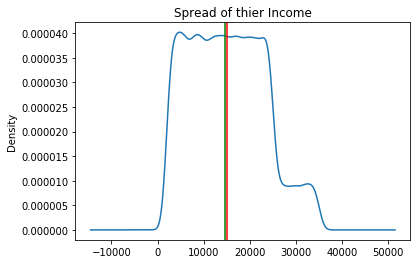

In [62]:
cust['Income (USD/Month)'].plot(kind = 'density')
plt.title('Spread of thier Income')
plt.axvline(cust['Income (USD/Month)'].mean(), color = 'r')
plt.axvline(cust['Income (USD/Month)'].median(), color = 'g')
plt.show()

In [63]:
print('The Average Income of the customers: ',cust['Income (USD/Month)'].mean(), 'USD/Month')

The Average Income of the customers:  15015.631856175389 USD/Month


In [64]:
corr = cust[['Age','Income (USD/Month)']].corr()

In [65]:
corr

,Age,Income (USD/Month)
Age,1.000000,0.000156
Income (USD/Month),0.000156,1.000000


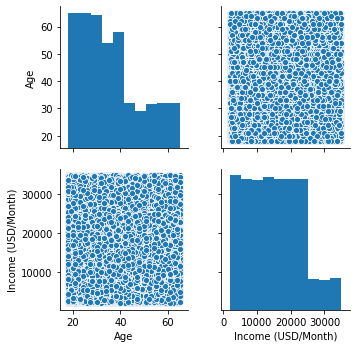

In [66]:
sns.pairplot(cust[['Age','Income (USD/Month)']])
plt.show()

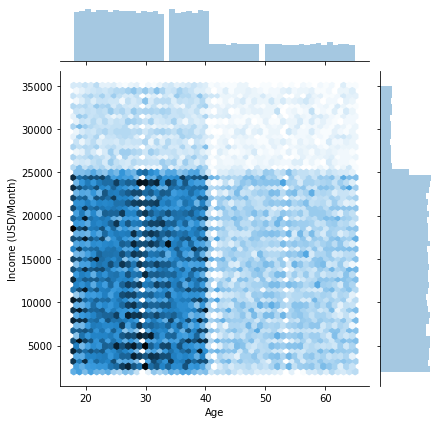

In [67]:
sns.jointplot(x = cust['Age'],y = cust['Income (USD/Month)'], kind = 'hex')
plt.show()

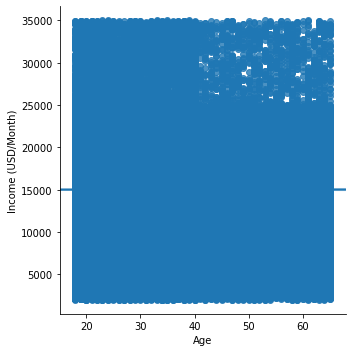

In [68]:
sns.lmplot(x = 'Age', y = 'Income (USD/Month)', data = cust)
plt.show()

- no relation at all, for income earned and Age

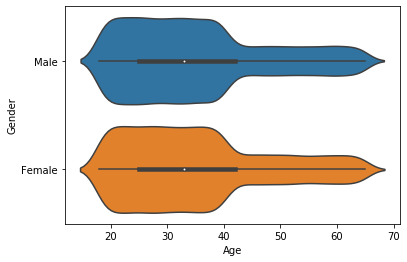

In [69]:
sns.violinplot(x = cust['Age'], y = cust['Gender'])
plt.show()

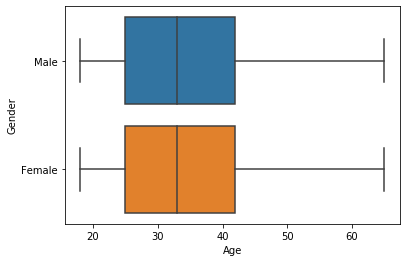

In [70]:
sns.boxplot(x = cust['Age'], y = cust['Gender'])
plt.show()

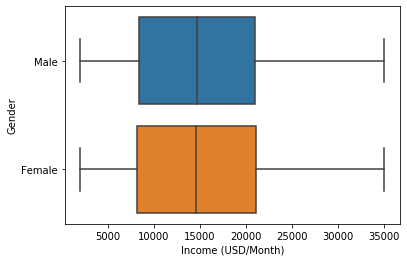

In [71]:
sns.boxplot(x = cust['Income (USD/Month)'], y = cust['Gender'])
plt.show()

### All 3 Data Sets

In [72]:
all_data = pd.merge(cab_transc , cust, on = 'Customer ID')

In [73]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 0 to 1557
Data columns (total 16 columns):
Transaction ID        1558 non-null int64
Date of Travel        1558 non-null object
Day                   1558 non-null int64
Month                 1558 non-null int64
Year                  1558 non-null int64
Company               1558 non-null object
City                  1558 non-null object
KM Travelled          1558 non-null float64
Price Charged         1558 non-null float64
Cost of Trip          1558 non-null float64
Profit Margin         1558 non-null float64
Customer ID           1558 non-null int64
Payment_Mode          1558 non-null object
Gender                1558 non-null object
Age                   1558 non-null int64
Income (USD/Month)    1558 non-null int64
dtypes: float64(4), int64(7), object(5)
memory usage: 206.9+ KB


In [74]:
all_data.describe()

,Transaction ID,Day,Month,Year,KM Travelled,Price Charged,Cost of Trip,Profit Margin,Customer ID,Age,Income (USD/Month)
count,1.558000e+03,1558.000000,1558.0,1558.0,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,1.000101e+07,8.269576,1.0,2016.0,22.637599,478.152125,284.634846,193.517279,19444.908216,34.886393,14872.437099
std,5.833350e+02,4.412627,0.0,0.0,12.278440,303.512623,157.573756,174.337867,20377.418986,12.668717,7953.293530
min,1.000001e+07,2.000000,1.0,2016.0,1.900000,22.200000,19.380000,-125.046000,8.000000,18.000000,2035.000000
25%,1.000054e+07,5.000000,1.0,2016.0,12.100000,227.190000,149.870500,61.513000,3975.250000,24.000000,8145.250000
50%,1.000093e+07,8.000000,1.0,2016.0,22.400000,440.085000,280.119000,149.877000,7631.500000,32.000000,14635.500000
75%,1.000148e+07,11.000000,1.0,2016.0,32.995000,687.887500,417.469000,281.349200,33780.000000,41.000000,20797.250000
max,1.000201e+07,19.000000,1.0,2016.0,47.600000,1544.450000,662.688000,948.545600,59965.000000,65.000000,34968.000000


In [75]:
all_data.head(3)

,Transaction ID,Date of Travel,Day,Month,Year,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Margin,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,01/08/16,8,1,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290,Card,Male,28,10813
1,10000012,01/06/16,6,1,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703,Card,Male,27,9237
2,10000013,01/02/16,2,1,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712,Cash,Male,53,11242


In [76]:
all_data['Date of Travel']

0       01/08/16
1       01/06/16
2       01/02/16
3       01/07/16
4       01/03/16
          ...   
1553    01/09/16
1554    01/09/16
1555    01/10/16
1556    01/14/16
1557    01/14/16
Name: Date of Travel, Length: 1558, dtype: object

#### 1. Which gender is travelling the most and using which company cabs?

In [77]:
cust['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [78]:
all_data['Gender'].value_counts()

Male    1558
Name: Gender, dtype: int64

In [79]:
# No female transcations data

In [80]:
cust.shape

(49171, 4)

In [81]:
all_data.shape

(1558, 16)

In [82]:
all_data.drop_duplicates(keep = 'first').shape

(1558, 16)

In [83]:
all_data['Gender'].value_counts()

Male    1558
Name: Gender, dtype: int64

### we have lost all the information about female

In [84]:
pd.crosstab(all_data['Company'], all_data['Gender'])

Gender,Male
Company,
Pink Cab,454
Yellow Cab,1104


In [85]:
pd.crosstab(all_data['Company'], all_data['Age'])

Age,18,19,20,21,22,23,24,25,26,27,...,56,57,58,59,60,61,62,63,64,65
Company,,,,,,,,,,,,,,,,,,,,,
Pink Cab,11,15,12,6,14,22,25,16,11,15,...,1,2,9,3,7,8,7,6,5,2
Yellow Cab,38,54,42,40,30,35,47,36,26,31,...,12,8,12,13,11,15,8,12,7,13


In [86]:
all_data['Age'].value_counts().head(3)

24    72
19    69
28    60
Name: Age, dtype: int64

In [87]:
pd.crosstab(all_data['Company'], all_data['Age'])[[24,19,28]]

Age,24,19,28
Company,,,
Pink Cab,25,15,17
Yellow Cab,47,54,43


In [88]:
all_data['Age'].value_counts().tail(3)

50    11
57    10
43     9
Name: Age, dtype: int64

In [89]:
pd.crosstab(all_data['Company'], all_data['Age'])[[50,57,43]]

Age,50,57,43
Company,,,
Pink Cab,4,2,1
Yellow Cab,7,8,8


In [90]:
c = all_data[['Cost of Trip', 'Payment_Mode', 'Age', 'Income (USD/Month)']].corr()
c

,Cost of Trip,Age,Income (USD/Month)
Cost of Trip,1.000000,-0.010885,0.027670
Age,-0.010885,1.000000,0.014328
Income (USD/Month),0.027670,0.014328,1.000000


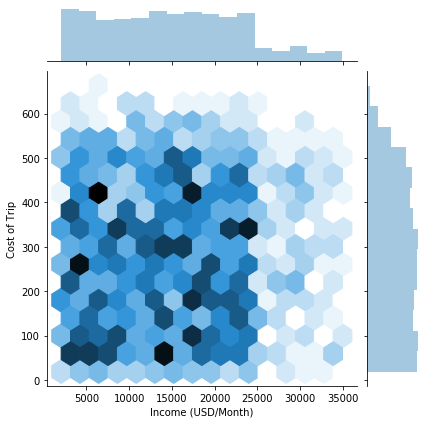

In [91]:
sns.jointplot(y = 'Cost of Trip', x = 'Income (USD/Month)', data = all_data,kind = 'hex', )
plt.show()

- Suprisingly, people with around 1000 USD/Month have also traveled huge distance, similar to those with 2000 USD/Month
- There were high density of population who travelling short distance having a monthly income of 1500 USD


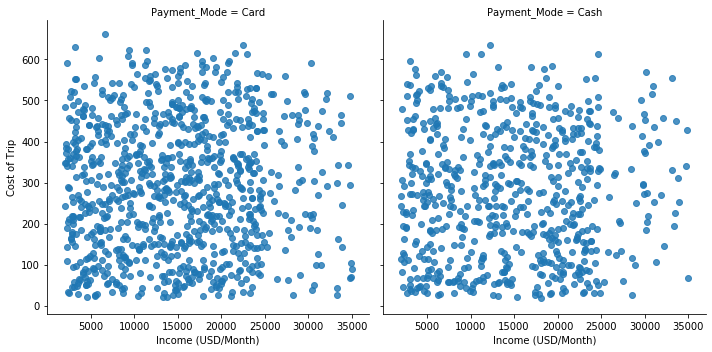

In [92]:
sns.lmplot(y = 'Cost of Trip', x = 'Income (USD/Month)', data = all_data, 
           fit_reg = False, col = 'Payment_Mode')
#plt.set_title('Payment Mode relation with Incoem and cost the trip')
plt.show()

- Density of the population income lower than 5000 USD, payed with card more than ith cash for thier Cab Transactions

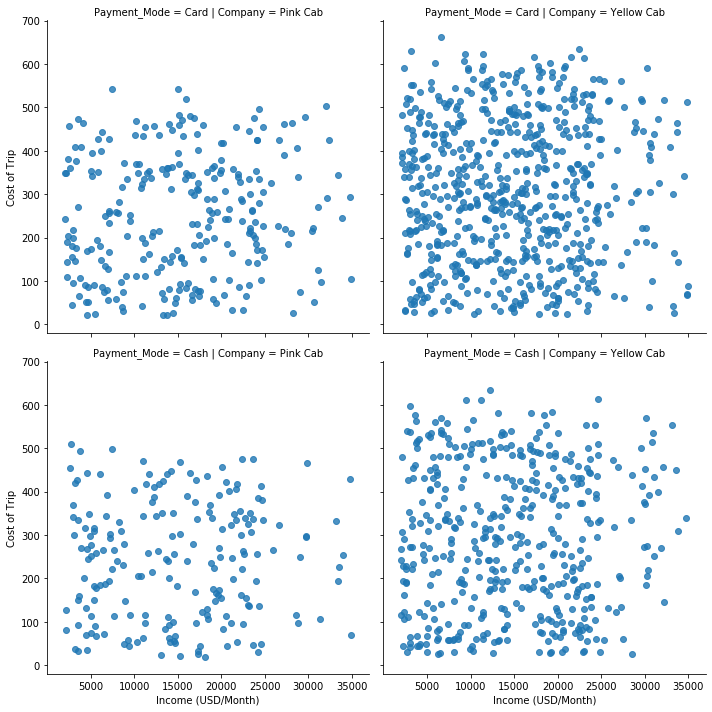

In [93]:
sns.lmplot(y = 'Cost of Trip', x = 'Income (USD/Month)', data = all_data, 
           fit_reg = False, row = 'Payment_Mode', col = 'Company')
plt.show()

#### age and monthly income

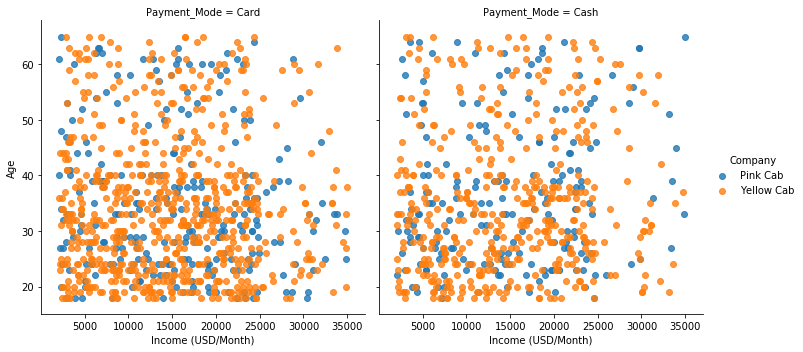

In [94]:
sns.lmplot(y = 'Age', x = 'Income (USD/Month)', data = all_data, 
           fit_reg = False, hue = 'Company', col = 'Payment_Mode')
plt.show()

In [95]:
all_data.head(3)

,Transaction ID,Date of Travel,Day,Month,Year,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Margin,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,01/08/16,8,1,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290,Card,Male,28,10813
1,10000012,01/06/16,6,1,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703,Card,Male,27,9237
2,10000013,01/02/16,2,1,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712,Cash,Male,53,11242


In [96]:
all_data['City'].value_counts()

CHICAGO IL        418
NEW YORK NY       253
LOS ANGELES CA    212
WASHINGTON DC     152
BOSTON MA         145
SAN DIEGO CA       99
ATLANTA GA         56
SEATTLE WA         55
DALLAS TX          40
SILICON VALLEY     37
ORANGE COUNTY      15
AUSTIN TX          14
DENVER CO          14
MIAMI FL           11
SACRAMENTO CA      10
PHOENIX AZ          9
NASHVILLE TN        7
TUCSON AZ           7
PITTSBURGH PA       4
Name: City, dtype: int64

In [97]:
pd.crosstab(all_data['City'], all_data['Company'])

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,14,42
AUSTIN TX,4,10
BOSTON MA,29,116
CHICAGO IL,60,358
DALLAS TX,12,28
DENVER CO,7,7
LOS ANGELES CA,104,108
MIAMI FL,6,5
NASHVILLE TN,5,2


In [98]:
all_data['Payment_Mode'].value_counts()

Card    914
Cash    644
Name: Payment_Mode, dtype: int64

In [99]:
all_data[['City','Payment_Mode']].groupby(all_data['Company']).count()

,City,Payment_Mode
Company,,
Pink Cab,454,454
Yellow Cab,1104,1104


# Hypothesis Testing
- Findings!!!
- 1. biased
- 2. cleainng
- 3. date columns... not proper
- Margin doesn't increases with increase in customers(  users )
- 1. prifts are same ,  for same company! H1 ..... then huge difference!
- P value <<<<<< 0.05 then there is huge impact n significant profit
-  PostHoc Test ......... tofind out which one!
- Look at the direct 
- On an average .... 
- City wise,  divide into samples.. groupby city( campanies) .. for chennai, takeavg sample margin ! 
- 
- investment , returns are same!
- 222..... year, 2 line plots, increase in margins) 
- year wise, population ( 
- population veru high, margin less... 
- 2 line plots, one in raise in population, raise in margin ! 


AGE:
- age: 18-40: , 40-70: 
- age doesnt have an impact on margin , or it has impact!
- top 4: metro, bottom 
-  H0: avg margin = avg of rural
- ( population of claa . - 40, 10: sample.... avg(sample) is directly respect to population!
GENDER:
- H0: avg margin of M = that of F


In [100]:
import scipy.stats as st


#### AGE Group testing

In [101]:
all_data.describe()['Age']

count    1558.000000
mean       34.886393
std        12.668717
min        18.000000
25%        24.000000
50%        32.000000
75%        41.000000
max        65.000000
Name: Age, dtype: float64

In [102]:
S1 = all_data[(all_data['Age'] >= 18) & (all_data['Age'] <= 35)]['Profit Margin']

In [103]:
S2 = all_data[(all_data['Age'] >= 36) & (all_data['Age'] <= 65)]['Profit Margin']

In [104]:
st.ttest_ind(S1,S2)

Ttest_indResult(statistic=0.8114254593633214, pvalue=0.41724548571413733)

###### Age doesnt have any impact on the MARGIN OF PROFIT

- INCOME

In [105]:
I1 = all_data[(all_data['Income (USD/Month)'] >= 2000) & (all_data['Income (USD/Month)'] <= 17000)]['Profit Margin']
I2 = all_data[(all_data['Income (USD/Month)'] >= 17001) & (all_data['Income (USD/Month)'] <= 35000)]['Profit Margin']


In [106]:
st.ttest_ind(I1,I2)

Ttest_indResult(statistic=0.4218969711620938, pvalue=0.6731585021926946)

###### Income doesnt have any impact on the MARGIN OF PROFIT

### Company Data

In [107]:
pink = all_data[all_data['Company'] == 'Pink Cab']['Profit Margin']
yello = all_data[all_data['Company'] == 'Yellow Cab']['Profit Margin']

In [108]:
st.f_oneway(pink, yello)

F_onewayResult(statistic=229.4322328853904, pvalue=1.890863084900095e-48)

- POST HOC

In [109]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [110]:
#pairwise_tukeyhsd(all_data['difference_In_prices'], all_data['Company'], alpha = 0.05)

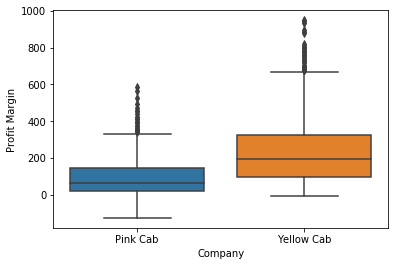

In [111]:
sns.boxplot(x = 'Company', y = 'Profit Margin', data = all_data)
plt.show()

- Mode of Payment

In [112]:
card = all_data[all_data['Payment_Mode'] == 'Card']['Profit Margin']
cash = all_data[all_data['Payment_Mode'] == 'Cash']['Profit Margin']

In [113]:
st.ttest_ind(card,cash)

Ttest_indResult(statistic=2.453985057501583, pvalue=0.014237214431379559)

In [114]:
###### Mode of payment has animpact on the MARGIN OF PROFIT

In [115]:
pairwise_tukeyhsd(all_data['Profit Margin'], all_data['Payment_Mode'], alpha = 0.05)

In [116]:
pairwise_tukeyhsd(all_data['Profit Margin'], all_data['Payment_Mode'], alpha = 0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Card,Cash,-21.9752,0.0142,-39.5401,-4.4102,True


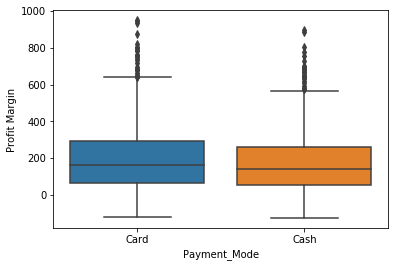

In [117]:
sns.boxplot(x = 'Payment_Mode', y = 'Profit Margin', data = all_data)
plt.show()

# Analysis w.r.t. Profit Margin

In [118]:
all_data.head()

,Transaction ID,Date of Travel,Day,Month,Year,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Margin,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,01/08/16,8,1,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290,Card,Male,28,10813
1,10000012,01/06/16,6,1,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703,Card,Male,27,9237
2,10000013,01/02/16,2,1,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712,Cash,Male,53,11242
3,10000014,01/07/16,7,1,2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,28020,Cash,Male,23,23327
4,10000015,01/03/16,3,1,2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,27182,Card,Male,33,8536


###### Which company has maximum cab users at a particular time period?


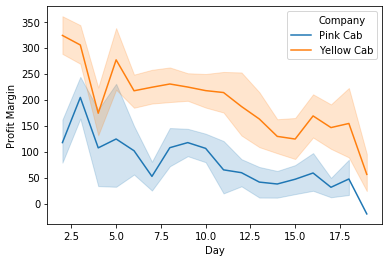

In [119]:
sns.lineplot(x = 'Day',  y =  'Profit Margin', data =  all_data,  hue = 'Company')
plt.show()

In [120]:
pd.crosstab(all_data['Profit Margin'],all_data['Day'])

Day,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Profit Margin,,,,,,,,,,,,,,,,,,
-125.0460,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
-121.6220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
-113.4600,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
-111.5000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
-94.4260,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885.1860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
895.7768,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
934.0560,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


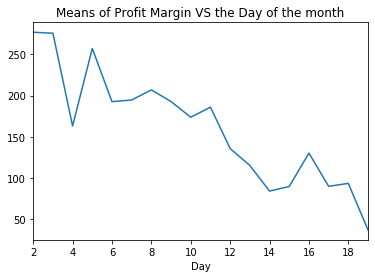

In [121]:
all_data['Profit Margin'].groupby(all_data['Day']).mean().plot(kind = 'line')
plt.title('Means of Profit Margin VS the Day of the month')
plt.show()

In [122]:
pink_df = all_data[all_data['Company'] == 'Pink Cab']
yello_df = all_data[all_data['Company'] == 'Yellow Cab']

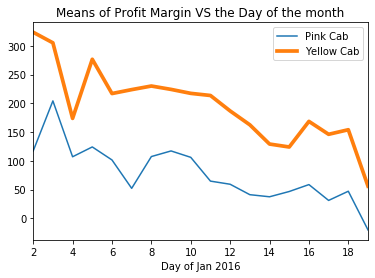

In [123]:
pink_df['Profit Margin'].groupby(pink_df['Day']).mean().plot(kind = 'line', label='Pink Cab',)
yello_df['Profit Margin'].groupby(yello_df['Day']).mean().plot(kind = 'line',  label='Yellow Cab',  linewidth=3.7)
plt.title('Means of Profit Margin VS the Day of the month')
plt.legend()
plt.xlabel('Day of Jan 2016')
plt.show()

### There is a huge PROFIT made in the beginning of the month, and sharp declination inbetween and towards the  end of the moth,  there is . a slight fluctuation  -  Yellow Cab
### Both the company, follow a similar trend,  and Pink Cab margin lying much below to Yellow Cab in terms of Profits

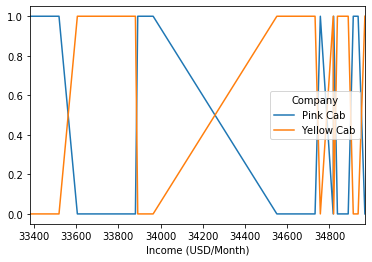

In [140]:
pd.crosstab(all_data['Income (USD/Month)'], all_data['Company']).tail(20).plot()

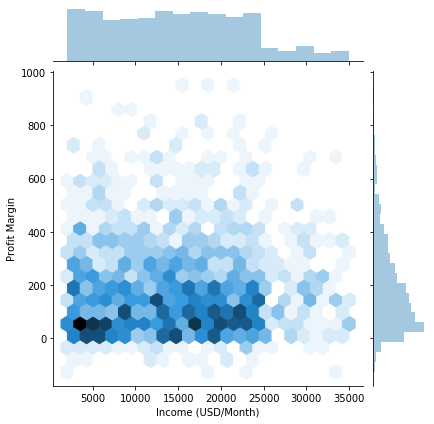

In [136]:
sns.jointplot(y = 'Profit Margin', x = 'Income (USD/Month)', data = all_data,kind = 'hex' )
plt.show()2

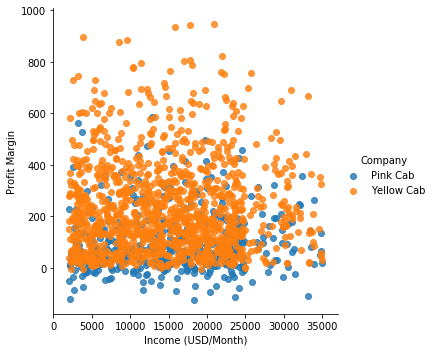

In [137]:
sns.lmplot(y = 'Profit Margin', x = 'Income (USD/Month)', data = all_data, 
           fit_reg = False, hue = 'Company', col = '')
plt.show()

In [138]:
I_1 = all_data[(all_data['Income (USD/Month)'] >= 2000) & (all_data['Income (USD/Month)'] <= 25000)]['Profit Margin']
I_2 = all_data[(all_data['Income (USD/Month)'] >= 25001) & (all_data['Income (USD/Month)'] <= 35000)]['Profit Margin']


In [139]:
st.ttest_ind(I_1,I_2)

Ttest_indResult(statistic=-0.31598000605199833, pvalue=0.7520600623030187)

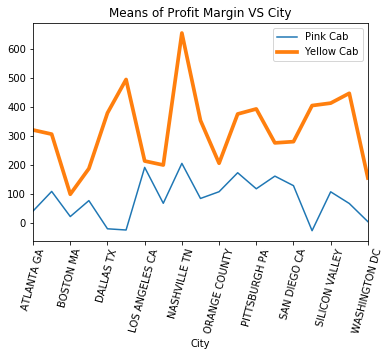

In [146]:
pink_df['Profit Margin'].groupby(pink_df['City']).mean().plot(kind = 'line', label='Pink Cab',)
yello_df['Profit Margin'].groupby(yello_df['City']).mean().plot(kind = 'line',  label='Yellow Cab',  linewidth=3.7)
plt.title('Means of Profit Margin VS City')
plt.legend()
plt.xticks(rotation = 75)
plt.show()

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 10 Text xticklabel objects>)

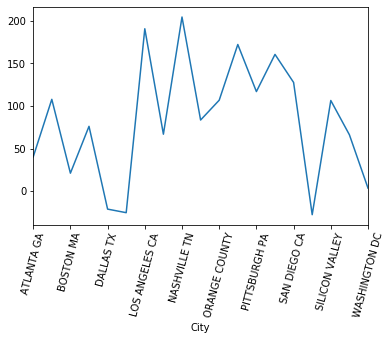

In [156]:
pink_df['Profit Margin'].groupby(pink_df['City']).mean().plot()
plt.xticks(rotation = 75)

In [149]:
yello_df['Profit Margin'].groupby(yello_df['City']).count()

City
ATLANTA GA         42
AUSTIN TX          10
BOSTON MA         116
CHICAGO IL        358
DALLAS TX          28
DENVER CO           7
LOS ANGELES CA    108
MIAMI FL            5
NASHVILLE TN        2
NEW YORK NY       201
ORANGE COUNTY       6
PHOENIX AZ          4
PITTSBURGH PA       2
SACRAMENTO CA       4
SAN DIEGO CA       41
SEATTLE WA         24
SILICON VALLEY     15
TUCSON AZ           3
WASHINGTON DC     128
Name: Profit Margin, dtype: int64

In [150]:
all_data['Profit Margin'].groupby(all_data['City']).count()

City
ATLANTA GA         56
AUSTIN TX          14
BOSTON MA         145
CHICAGO IL        418
DALLAS TX          40
DENVER CO          14
LOS ANGELES CA    212
MIAMI FL           11
NASHVILLE TN        7
NEW YORK NY       253
ORANGE COUNTY      15
PHOENIX AZ          9
PITTSBURGH PA       4
SACRAMENTO CA      10
SAN DIEGO CA       99
SEATTLE WA         55
SILICON VALLEY     37
TUCSON AZ           7
WASHINGTON DC     152
Name: Profit Margin, dtype: int64

In [175]:
city.head()

,City,Population,Users,Percentage_of_users
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756


In [176]:
all_data.head()

,Transaction ID,Date of Travel,Day,Month,Year,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Margin,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,01/08/16,8,1,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290,Card,Male,28,10813
1,10000012,01/06/16,6,1,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703,Card,Male,27,9237
2,10000013,01/02/16,2,1,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712,Cash,Male,53,11242
3,10000014,01/07/16,7,1,2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,28020,Cash,Male,23,23327
4,10000015,01/03/16,3,1,2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,27182,Card,Male,33,8536


In [188]:
all_four = pd.merge(city,all_data, on = 'City')
all_four.head()

,City,Population,Users,Percentage_of_users,Transaction ID,Date of Travel,Day,Month,Year,Company,KM Travelled,Price Charged,Cost of Trip,Profit Margin,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,NEW YORK NY,8405837,302149,3.594514,10000139,01/08/16,8,1,2016,Pink Cab,17.85,242.90,198.135,44.765,2416,Cash,Male,28,21399
1,NEW YORK NY,8405837,302149,3.594514,10000140,01/09/16,9,1,2016,Pink Cab,25.30,407.21,255.530,151.680,2060,Card,Male,18,8149
2,NEW YORK NY,8405837,302149,3.594514,10000141,01/06/16,6,1,2016,Pink Cab,16.32,236.41,186.048,50.362,1451,Card,Male,35,23989
3,NEW YORK NY,8405837,302149,3.594514,10000142,01/04/16,4,1,2016,Pink Cab,12.43,194.61,144.188,50.422,1609,Card,Male,30,23036
4,NEW YORK NY,8405837,302149,3.594514,10000143,01/09/16,9,1,2016,Pink Cab,29.70,434.57,350.460,84.110,2927,Cash,Male,33,14520


In [189]:
all_four[['City', 'Company']]

,City,Company
0,NEW YORK NY,Pink Cab
1,NEW YORK NY,Pink Cab
2,NEW YORK NY,Pink Cab
3,NEW YORK NY,Pink Cab
4,NEW YORK NY,Pink Cab
...,...,...
1553,BOSTON MA,Yellow Cab
1554,BOSTON MA,Yellow Cab
1555,BOSTON MA,Yellow Cab
1556,BOSTON MA,Yellow Cab


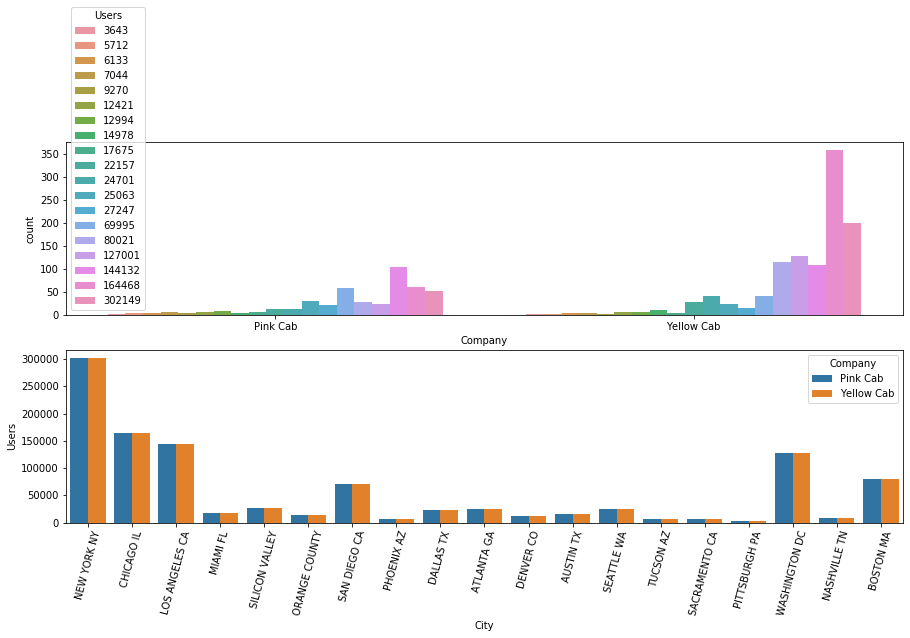

In [205]:
fig , ax = plt.subplots(2,1,figsize= (15,7))
sns.barplot(x ='City', y = 'Users', data = all_four, hue = 'Company', ax = ax[1])
plt.xticks(rotation = 75)
sns.countplot( hue = 'Users', data = all_four, x = 'Company', ax = ax[0])
plt.show()

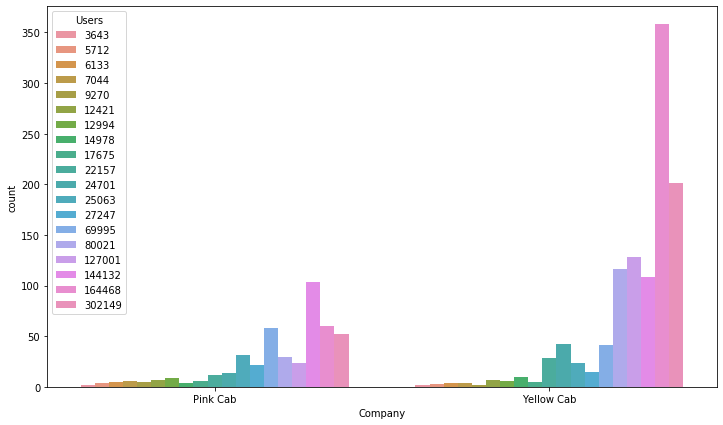

In [200]:
plt.subplots(figsize= (12,7))
sns.countplot( hue = 'Users', data = all_four, x = 'Company')